# Mini Project III: Data wrangling, Clustering, PCA

## 

## 1. Create customer segmentation based on customer demographics and output radar graph

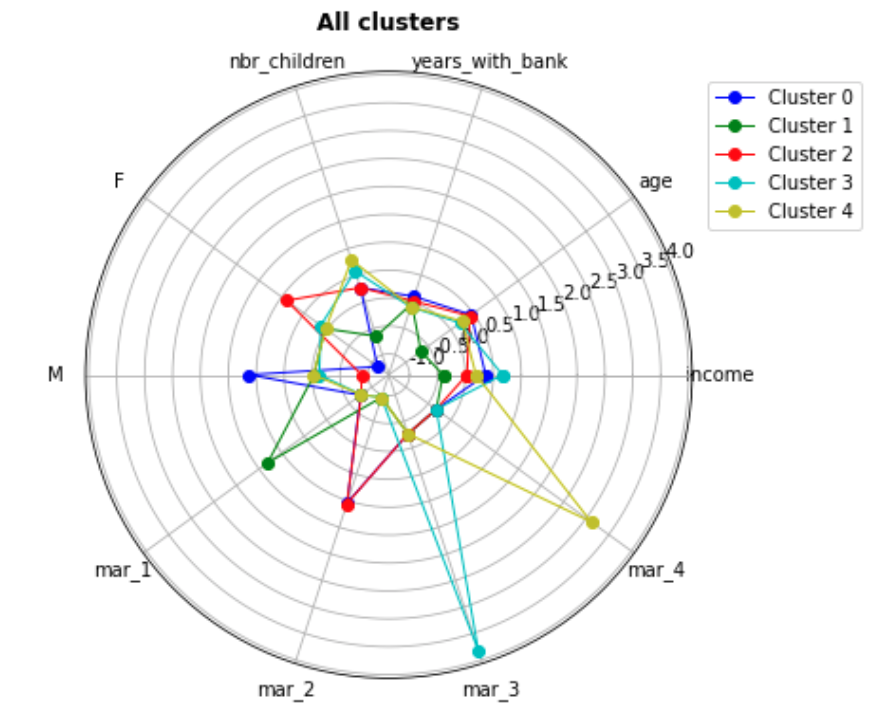

In [228]:
from IPython.display import Image
Image(filename='temp.PNG', width = 300, height = 300)

In [1]:
import pandas as pd

### 

### Import data from 'twm_customer.csv'

In [230]:
df_cust = pd.read_csv('twm_customer.csv', sep = ';')

In [282]:
df_cust.head(3)

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,...,street_name,postal_code,city_name,state_code,F,M,mar_1,mar_2,mar_3,mar_4
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,...,Second ...,89194,Las Vegas,NV,0,1,0,1,0,0
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,...,Daffodil ...,90159,Los Angeles,CA,0,1,0,1,0,0
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,...,Figueroa ...,90024,Los Angeles,CA,1,0,1,0,0,0


### 

### Create dummy variables for gender (categorical variable: M, F)

In [231]:
df_cust_gender = pd.get_dummies(df_cust['gender'])

In [232]:
df_cust = df_cust.join(df_cust_gender)

### 

### Create dummy varibales for marital status (categorical variable: 1, 2, 3, 4)

In [233]:
df_cust_mar = pd.get_dummies(df_cust['marital_status'])
df_cust_mar.rename(columns = {1:'mar_1',2:'mar_2',3:'mar_3',4:'mar_4'}, inplace=True)

In [234]:
df_cust = df_cust.join(df_cust_mar)

### 

### Filter only on numeric columns and drop unecessary columns

In [235]:
df_cust_numeric = df_cust.select_dtypes(exclude='object')

In [236]:
df_cust_numeric.drop(['street_nbr'], axis = 1, inplace=True)

/Users/jimisi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [237]:
df_cust_numeric.drop(['postal_code'], axis = 1, inplace=True)

In [238]:
df_cust_numeric.drop(['cust_id'], axis = 1, inplace=True)

In [239]:
df_cust_numeric.drop(['marital_status'], axis = 1, inplace=True)

### 

### Inspect and clean data

In [242]:
df_cust_numeric.describe()

,income,age,years_with_bank,nbr_children,F,M,mar_1,mar_2,mar_3,mar_4
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,22728.281124,42.479250,3.907631,0.714859,0.559572,0.440428,0.369478,0.472557,0.064257,0.093708
std,22207.221405,19.114879,2.675634,1.103410,0.496771,0.496771,0.482987,0.499581,0.245375,0.291618
min,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7118.500000,28.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17242.000000,42.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31338.000000,56.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,144157.000000,89.000000,9.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 

#### Find if there are NaN in the data.... There are none. 

In [283]:
df_cust_numeric.isnull().sum()

income             0
age                0
years_with_bank    0
nbr_children       0
F                  0
M                  0
mar_1              0
mar_2              0
mar_3              0
mar_4              0
dtype: int64

#### 

#### Looks like there are some people with zero years with the bank. Could be outliers...

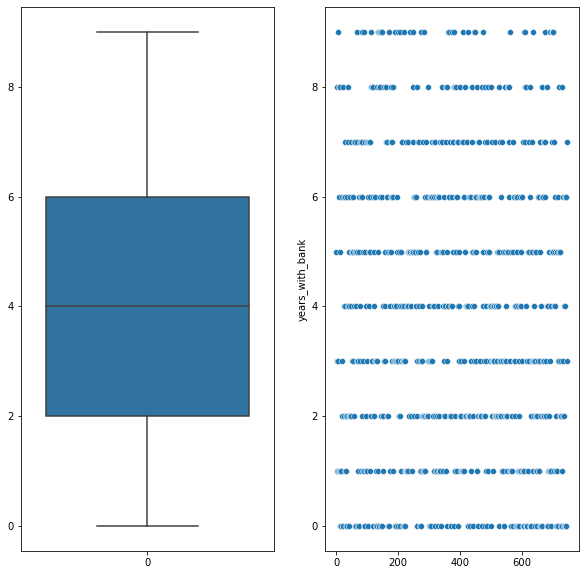

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(121)
sns.boxplot(data=df_cust_numeric['years_with_bank'])

ax1 = fig.add_subplot(122)
sns.scatterplot(data=df_cust_numeric['years_with_bank'])

plt.show()

In [254]:
import numpy as np
years_75, years_25 = np.percentile(df_cust_numeric['years_with_bank'], [75 ,25])
iqr = years_75 - years_25
print(iqr)

4.0


#### ...but from looking at the boxplot, scatter and IQR, the zeros do seem reasonable. 

####  

#### Inspect income...

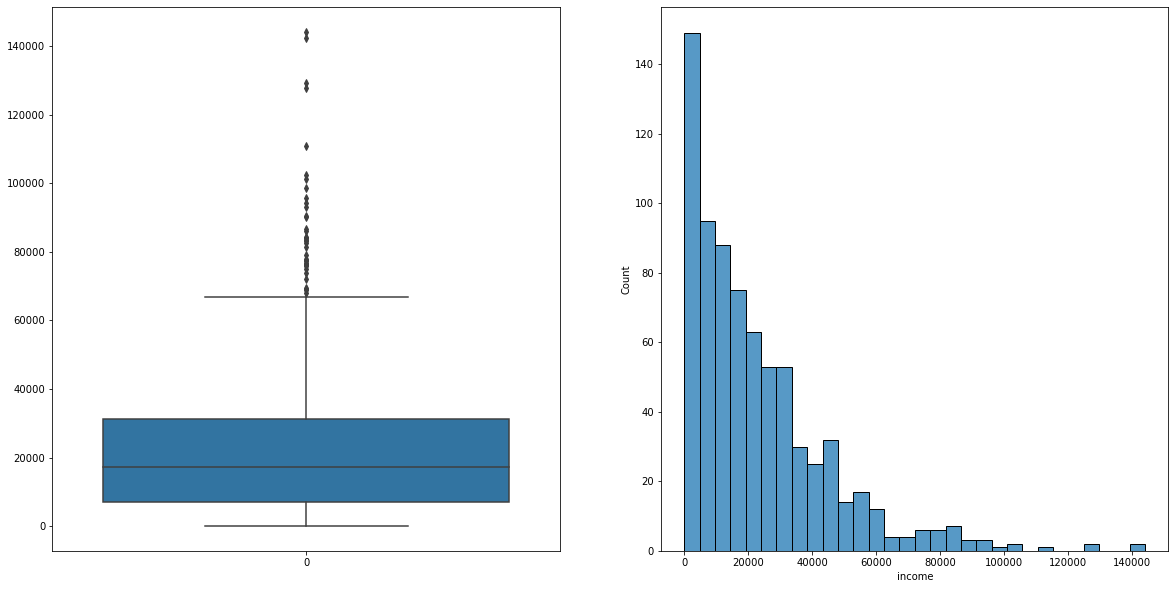

In [262]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(121)
sns.boxplot(data=df_cust_numeric['income'])

ax1 = fig.add_subplot(122)
sns.histplot(data=df_cust_numeric['income'], bins=30)

plt.show()

#### ...It does seem like there are some outliers, but we believe that these outliers are legitimate. There are some people how are indeed rich. And $140,000 does not seem that unreasonable.

####  

#### Inspect age...

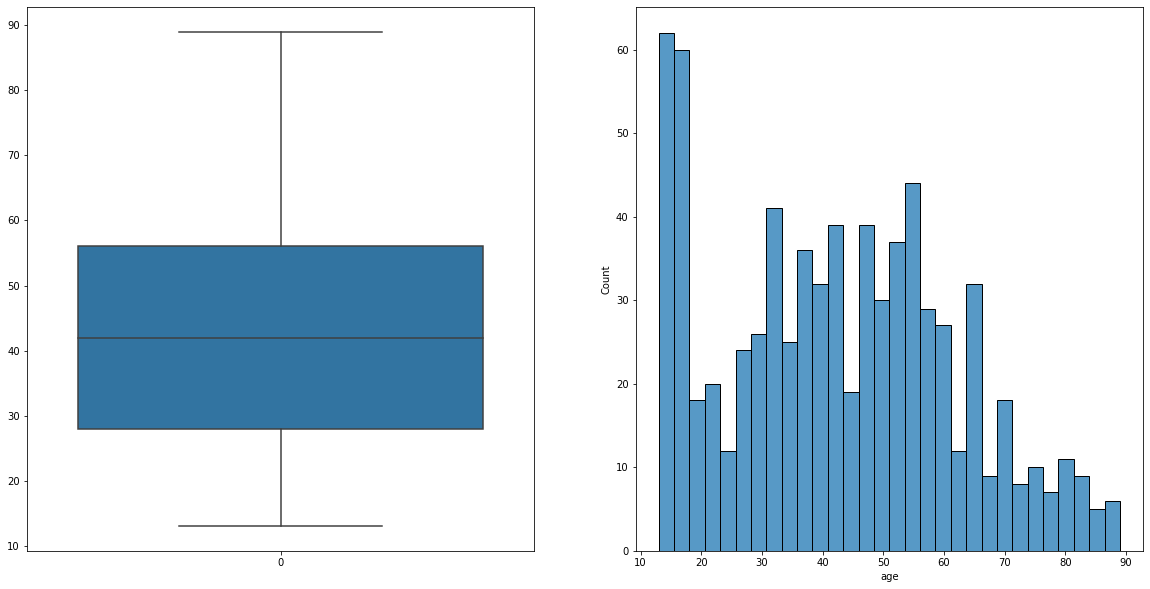

In [264]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(121)
sns.boxplot(data=df_cust_numeric['age'])

ax1 = fig.add_subplot(122)
sns.histplot(data=df_cust_numeric['age'], bins=30)

plt.show()

#### ...no major outliers. The max age is 89 which is within reason.

####  

#### Inspect gender...

In [275]:
df_cust_numeric[['M ','F ']].describe()

,M,F
count,747.000000,747.000000
mean,0.440428,0.559572
std,0.496771,0.496771
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


#### ...seems reasonable. Max is 1 and min is 0 and the mean is about 0.5, with females making up slightly larger proportion.

####  

#### Inspect marital status...

In [276]:
df_cust_numeric[['mar_1','mar_2','mar_3','mar_4']].describe()

,mar_1,mar_2,mar_3,mar_4
count,747.000000,747.000000,747.000000,747.000000
mean,0.369478,0.472557,0.064257,0.093708
std,0.482987,0.499581,0.245375,0.291618
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


#### ...we don't have visibility into what each category means but we an assume that the 1 and 2 is married or single since they make up large portions of the dataset. The data does not seem to raise any red flags.

### 

### Standardize the data

In [142]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cust_std = scaler.fit_transform(df_cust_numeric)

# statistics of scaled data
pd.DataFrame(cust_std).describe()

,0,1,2,3,4,5,6,7,8,9
count,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02
mean,-6.532035e-17,-9.393052e-17,-1.159269e-17,-1.284113e-16,1.646757e-16,4.458727e-17,8.382407e-17,4.310103e-17,5.944969e-17,-5.305885e-17
std,1.000670e+00,1.000670e+00,1.000670e+00,1.000670e+00,1.000670e+00,1.000670e+00,1.000670e+00,1.000670e+00,1.000670e+00,1.000670e+00
min,-1.024149e+00,-1.543248e+00,-1.461429e+00,-6.482980e-01,-1.127172e+00,-8.871760e-01,-7.654980e-01,-9.465406e-01,-2.620487e-01,-3.215546e-01
25%,-7.033856e-01,-7.579934e-01,-7.134417e-01,-6.482980e-01,-1.127172e+00,-8.871760e-01,-7.654980e-01,-9.465406e-01,-2.620487e-01,-3.215546e-01
50%,-2.472149e-01,-2.508891e-02,3.454560e-02,-6.482980e-01,8.871760e-01,-8.871760e-01,-7.654980e-01,-9.465406e-01,-2.620487e-01,-3.215546e-01
75%,3.879588e-01,7.078156e-01,7.825328e-01,2.585908e-01,8.871760e-01,1.127172e+00,1.306339e+00,1.056479e+00,-2.620487e-01,-3.215546e-01
max,5.471647e+00,2.435376e+00,1.904514e+00,3.886146e+00,8.871760e-01,1.127172e+00,1.306339e+00,1.056479e+00,3.816084e+00,3.109892e+00


In [143]:
df_cust_std = pd.DataFrame(cust_std)

In [144]:
df_cust_std.shape

(747, 10)

### 

### K-Means clustering using k = 5 

In [277]:
from sklearn.cluster import KMeans
import numpy as np

In [278]:
km = KMeans(n_clusters=5, # how many clusters that was provided in the question
            n_init=20, # how many initial runs
            random_state=None)

In [279]:
# fit and predict
y_km = km.fit_predict(cust_std)

In [280]:
df_y_km = pd.DataFrame(y_km)

In [281]:
df_y_km.rename(columns = {0:'cluster'}, inplace = True)

#### 

#### Add column names back to the standardize dataframe

In [151]:
df_cust_std.columns = df_cust_numeric.columns

### 

### Plot cluster in radar plot (polar in matplotlib) 

In [221]:
plot_data = km.cluster_centers_ #We want to plot the center of each cluster
print(plot_data.min()) #Find the min value for the radial labels
print(plot_data.max()) #Find the max value for the radial labels

-1.1271719998852123
3.8160843806184364


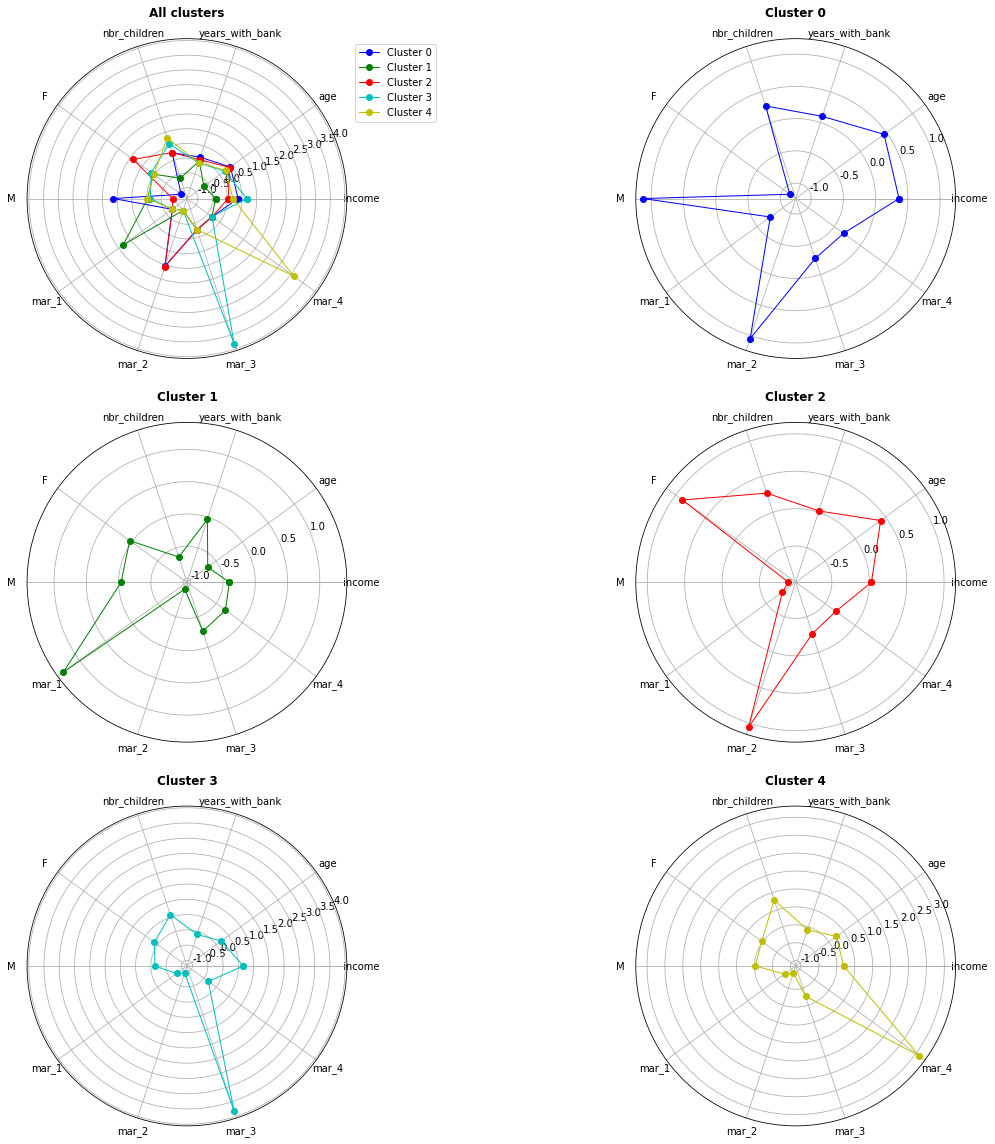

In [222]:
labels = df_cust_std.columns 
k = 5
n_features = 10
min_r = -2.0
max_r = 4.5

color = ['b', 'g', 'r', 'c', 'y'] 

angles = np.linspace(0, 2*np.pi, n_features, endpoint=False)
angles = np.concatenate((angles, [angles[0]])) 
plot_data = np.concatenate((plot_data, plot_data[:,[0]]), axis=1) 

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(321, polar=True) 
ax.set_rgrids(np.arange(min_r, max_r, 0.5), np.arange(min_r, max_r, 0.5))
ax.set_thetagrids(angles * 180/np.pi, labels)
for i in range(len(plot_data)):
    ax.plot(angles, plot_data[i], 'o-', color = color[i], label = 'Cluster '+str(i), linewidth=1)
plt.legend(bbox_to_anchor=(1.01,1),loc='upper left')
ax.set_title('All clusters', fontweight='bold')

ax2 = fig.add_subplot(322, polar=True) 
ax2.set_rgrids(np.arange(min_r, max_r, 0.5), np.arange(min_r, max_r, 0.5))
ax2.set_thetagrids(angles * 180/np.pi, labels)
ax2.plot(angles, plot_data[0], 'o-', color = color[0], label = 'Cluster '+str(0), linewidth=1)
ax2.set_title('Cluster '+str(0), fontweight='bold')

ax3 = fig.add_subplot(323, polar=True) 
ax3.set_rgrids(np.arange(min_r, max_r, 0.5), np.arange(min_r, max_r, 0.5))
ax3.set_thetagrids(angles * 180/np.pi, labels)
ax3.plot(angles, plot_data[1], 'o-', color = color[1], label = 'Cluster '+str(1), linewidth=1)
ax3.set_title('Cluster '+str(1), fontweight='bold')

ax4 = fig.add_subplot(324, polar=True) 
ax4.set_rgrids(np.arange(min_r, max_r, 0.5), np.arange(min_r, max_r, 0.5))
ax4.set_thetagrids(angles * 180/np.pi, labels)
ax4.plot(angles, plot_data[2], 'o-', color = color[2], label = 'Cluster '+str(2), linewidth=1)
ax4.set_title('Cluster '+str(2), fontweight='bold')

ax5 = fig.add_subplot(325, polar=True) 
ax5.set_rgrids(np.arange(min_r, max_r, 0.5), np.arange(min_r, max_r, 0.5))
ax5.set_thetagrids(angles * 180/np.pi, labels)
ax5.plot(angles, plot_data[3], 'o-', color = color[3], label = 'Cluster '+str(3), linewidth=1)
ax5.set_title('Cluster '+str(3), fontweight='bold')

ax6 = fig.add_subplot(326, polar=True) 
ax6.set_rgrids(np.arange(min_r, max_r, 0.5), np.arange(min_r, max_r, 0.5))
ax6.set_thetagrids(angles * 180/np.pi, labels)
ax6.plot(angles, plot_data[4], 'o-', color = color[4], label = 'Cluster '+str(4), linewidth=1)
ax6.set_title('Cluster '+str(4), fontweight='bold')

plt.show()

## 

## 

## 

## 

## 2. Create customer segmentation based on banking behavior and output radar graph

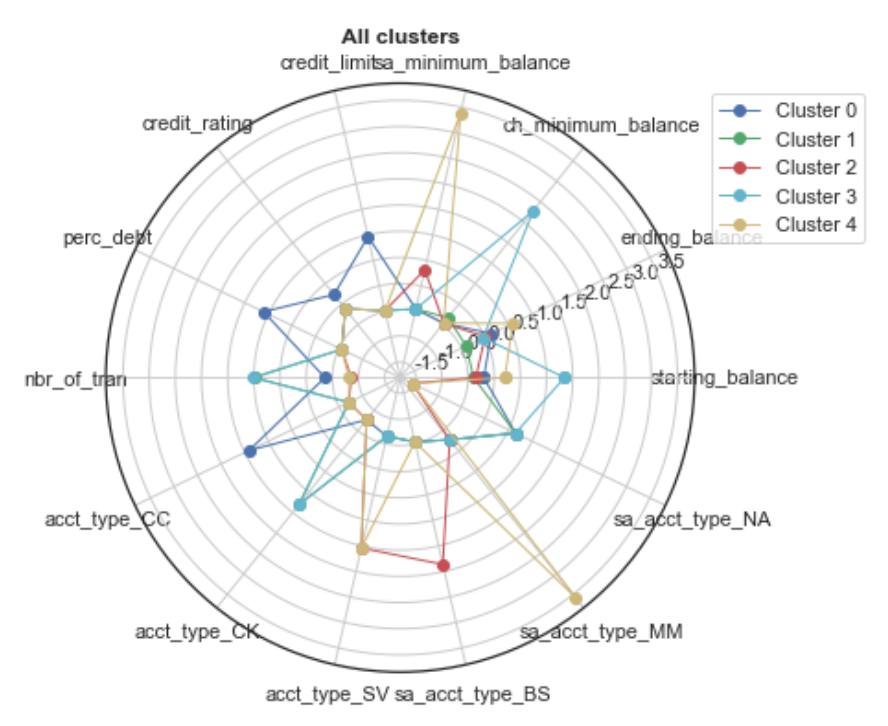

In [726]:
from IPython.display import Image
Image(filename='temp2.PNG', width = 300, height = 300)

### Import data from csv files

In [637]:
df_acct = pd.read_csv('twm_accounts.csv', sep = ';')
df_acct_ch = pd.read_csv('twm_checking_acct.csv', sep=';')
df_acct_sa = pd.read_csv('twm_savings_acct.csv', sep=';')
df_acct_cr = pd.read_csv('twm_credit_acct.csv', sep=';')

In [638]:
df_tran = pd.read_csv('twm_transactions.csv', sep=';')
df_tran_ch = pd.read_csv('twm_checking_tran.csv', sep=';')
df_tran_sa = pd.read_csv('twm_savings_tran.csv', sep=';')
df_tran_cr = pd.read_csv('twm_credit_tran.csv', sep=';')

#### 

### Create a consolidated DataFrame that includes data from the main accounts table and the three other tables

#### Concatentate the columns 'cust_id' and 'acct_nbr' in the main 'accounts' dataframe. The clustering will be based on this since one customer can have several checking or several savings or several credit card accounts.

In [639]:
df_acct['acct_nbr'] = df_acct['acct_nbr'].astype('str')

In [640]:
df_acct['cust_id'] = df_acct['cust_id'].astype('str')

In [641]:
df_acct['cust_id_acct_nbr'] = df_acct['cust_id'] + df_acct['acct_nbr']

In [642]:
first_col = df_acct.pop('cust_id_acct_nbr')
df_acct.insert(0, 'cust_id_acct_nbr', first_col)
df_acct.head()

,cust_id_acct_nbr,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,136280613628063,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,13627094561143213627090,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,13628364561143213628360,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,136331113633112,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,13633614561143213633610,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


#### 

#### Concatentate the columns 'cust_id' and 'acct_nbr' in the checking accounts dataframe

In [643]:
df_acct_ch['acct_nbr'] = df_acct_ch['acct_nbr'].astype('str')
df_acct_ch['cust_id'] = df_acct_ch['cust_id'].astype('str')
df_acct_ch['cust_id_acct_nbr'] = df_acct_ch['cust_id'] + df_acct_ch['acct_nbr']

In [644]:
first_col = df_acct_ch.pop('cust_id_acct_nbr')
df_acct_ch.insert(0, 'cust_id_acct_nbr', first_col)
df_acct_ch.head()

,cust_id_acct_nbr,cust_id,acct_nbr,minimum_balance,per_check_fee,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,136254813625482,1362548,13625482,3000,0.00,Y,11.11.1986,NaN,6004.34,569.65
1,136248713624872,1362487,13624872,3000,0.00,Y,12.1.1995,NaN,2781.07,1401.21
2,136301713630172,1363017,13630172,3000,0.00,Y,19.3.1994,NaN,2694.91,147.15
3,136275213627522,1362752,13627522,100,0.15,Y,8.1.1994,NaN,487.69,3.76
4,136328213632822,1363282,13632822,100,0.15,Y,5.3.1988,NaN,133.90,84.18


#### 

#### Concatentate the columns 'cust_id' and 'acct_nbr' in the savings accounts dataframe

In [645]:
df_acct_sa['acct_nbr'] = df_acct_sa['acct_nbr'].astype('str')
df_acct_sa['cust_id'] = df_acct_sa['cust_id'].astype('str')
df_acct_sa['cust_id_acct_nbr'] = df_acct_sa['cust_id'] + df_acct_sa['acct_nbr']

In [646]:
first_col = df_acct_sa.pop('cust_id_acct_nbr')
df_acct_sa.insert(0, 'cust_id_acct_nbr', first_col)
df_acct_sa.head()

,cust_id_acct_nbr,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,136316013631603,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,136248713624873,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,136254813625483,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,136275213627523,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,136301713630173,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35


#### 

#### Concatentate the columns 'cust_id' and 'acct_nbr' in the credit accounts dataframe

In [647]:
df_acct_cr['acct_nbr'] = df_acct_cr['acct_nbr'].astype('str')
df_acct_cr['cust_id'] = df_acct_cr['cust_id'].astype('str')
df_acct_cr['cust_id_acct_nbr'] = df_acct_cr['cust_id'] + df_acct_cr['acct_nbr']

In [648]:
first_col = df_acct_cr.pop('cust_id_acct_nbr')
df_acct_cr.insert(0, 'cust_id_acct_nbr', first_col)
df_acct_cr.head()

,cust_id_acct_nbr,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13631604561143213631600,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,13624874561143213624870,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,13625484561143213625480,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,13627524561143213627520,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,13630174561143213630170,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00


#### Add a new column to show how much debt each account is in.

In [649]:
df_acct_cr['perc_debt'] = df_acct_cr['ending_balance'] / df_acct_cr['credit_limit']

#### 

#### Merge main 'accounts' table with checking table to add ['minimum_balance','per_check_fee']

In [650]:
df_acct = pd.merge(df_acct, df_acct_ch[['cust_id_acct_nbr','minimum_balance','per_check_fee']], \
                   on='cust_id_acct_nbr', how='left')

In [651]:
df_acct.rename(columns = {'minimum_balance': 'ch_minimum_balance','per_check_fee':'ch_per_check_fee'}, inplace=True)

In [652]:
df_acct.head()

,cust_id_acct_nbr,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,ch_minimum_balance,ch_per_check_fee
0,136280613628063,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58,NaN,NaN
1,13627094561143213627090,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15,NaN,NaN
2,13628364561143213628360,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00,NaN,NaN
3,136331113633112,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46,3000.0,0.0
4,13633614561143213633610,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28,NaN,NaN


#### 

#### Merge main 'accounts' table with savings table to add ['minimum_balance','acct_type']

In [653]:
df_acct = pd.merge(df_acct, df_acct_sa[['cust_id_acct_nbr','minimum_balance','acct_type']], \
                   on='cust_id_acct_nbr', how='left')

In [654]:
df_acct.rename(columns = {'minimum_balance': 'sa_minimum_balance','acct_type_x':'acct_type',\
                          'minimum_balance':'sa_minimum_balance','acct_type_y':'sa_acct_type'}, inplace=True)

In [655]:
df_acct.head()

,cust_id_acct_nbr,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,ch_minimum_balance,ch_per_check_fee,sa_minimum_balance,sa_acct_type
0,136280613628063,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58,NaN,NaN,500.0,MM
1,13627094561143213627090,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15,NaN,NaN,NaN,NaN
2,13628364561143213628360,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00,NaN,NaN,NaN,NaN
3,136331113633112,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46,3000.0,0.0,NaN,NaN
4,13633614561143213633610,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28,NaN,NaN,NaN,NaN


#### 

#### Merge main 'accounts' table with credit table to add ['credit_limit','credit_rating']

In [656]:
df_acct = pd.merge(df_acct, df_acct_cr[['cust_id_acct_nbr','credit_limit','credit_rating','perc_debt']], \
                   on='cust_id_acct_nbr', how='left')

In [657]:
df_acct.head()

,cust_id_acct_nbr,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,ch_minimum_balance,ch_per_check_fee,sa_minimum_balance,sa_acct_type,credit_limit,credit_rating,perc_debt
0,136280613628063,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58,NaN,NaN,500.0,MM,NaN,NaN,NaN
1,13627094561143213627090,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15,NaN,NaN,NaN,NaN,1000.0,0.0,0.49615
2,13628364561143213628360,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00,NaN,NaN,NaN,NaN,1000.0,0.0,1.00000
3,136331113633112,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46,3000.0,0.0,NaN,NaN,NaN,NaN,NaN
4,13633614561143213633610,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28,NaN,NaN,NaN,NaN,1300.0,0.0,0.35560


#### 

#### Find number of transactions per account

In [658]:
df_tran_num = pd.DataFrame(df_tran['acct_nbr'].value_counts())

In [659]:
df_tran_num.rename(columns = {'acct_nbr':'nbr_of_tran'}, inplace=True)

In [660]:
df_tran_num = df_tran_num.reset_index()

In [661]:
df_tran_num.rename(columns = {'index':'acct_nbr'}, inplace=True)

In [662]:
df_tran_num.head()

,acct_nbr,nbr_of_tran
0,4561143213630020,155
1,4561143213626830,141
2,4561143213627770,137
3,4561143213632490,131
4,4561143213629780,112


In [663]:
df_tran_num['acct_nbr'] = df_tran_num['acct_nbr'].astype('str')

#### 

#### Merge main 'accounts' table with transactions table to add ['nbr_of_tran']

In [664]:
df_acct = pd.merge(df_acct, df_tran_num, on='acct_nbr', how='left')

In [665]:
df_acct.head()

,cust_id_acct_nbr,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,ch_minimum_balance,ch_per_check_fee,sa_minimum_balance,sa_acct_type,credit_limit,credit_rating,perc_debt,nbr_of_tran
0,136280613628063,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58,NaN,NaN,500.0,MM,NaN,NaN,NaN,40.0
1,13627094561143213627090,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15,NaN,NaN,NaN,NaN,1000.0,0.0,0.49615,55.0
2,13628364561143213628360,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00,NaN,NaN,NaN,NaN,1000.0,0.0,1.00000,41.0
3,136331113633112,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46,3000.0,0.0,NaN,NaN,NaN,NaN,NaN,99.0
4,13633614561143213633610,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28,NaN,NaN,NaN,NaN,1300.0,0.0,0.35560,43.0


#### 

### Clean data in the main dataframe

#### Find columns with a lot of nulls

In [666]:
df_acct.isnull().sum()

cust_id_acct_nbr         0
acct_nbr                 0
cust_id                  0
acct_type                0
account_active           0
acct_start_date          0
acct_end_date         1266
starting_balance         0
ending_balance           0
ch_minimum_balance     889
ch_per_check_fee       889
sa_minimum_balance     988
sa_acct_type           988
credit_limit           941
credit_rating          941
perc_debt              941
nbr_of_tran             12
dtype: int64

#### Therefore we should drop acct_end_date

In [667]:
df_acct.drop(['acct_end_date'], axis = 1, inplace=True)

#### 

#### Do we need inactive accounts? No.

In [668]:
df_acct['account_active'].value_counts()

Y     1266
N      143
Name: account_active, dtype: int64

In [669]:
df_acct = df_acct[df_acct['account_active'] == 'Y ']

In [670]:
df_acct.drop(['account_active'], axis = 1, inplace=True)

#### 

#### Create dummy variables for acct_type

In [671]:
df_acct_type = pd.get_dummies(df_acct['acct_type'])
df_acct_type.rename(columns = {'CC  ':'acct_type_CC','CK  ':'acct_type_CK','SV  ':'acct_type_SV'}, inplace=True)

In [672]:
df_acct_type.head()

,acct_type_CC,acct_type_CK,acct_type_SV
0,0,0,1
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0


In [673]:
df_acct = df_acct.join(df_acct_type)

In [674]:
df_acct.drop(['acct_type'], axis = 1, inplace=True)

#### 

#### Create dummy variables for sa_acct_type

In [675]:
df_acct['sa_acct_type'].value_counts()

BS      283
MM       92
Name: sa_acct_type, dtype: int64

In [676]:
df_acct['sa_acct_type'] = df_acct['sa_acct_type'].fillna('NA')

In [677]:
df_sa_acct_type = pd.get_dummies(df_acct['sa_acct_type'])
df_sa_acct_type.rename(columns = {'BS  ':'sa_acct_type_BS','MM  ':'sa_acct_type_MM','NA':'sa_acct_type_NA'}, inplace=True)

In [678]:
df_sa_acct_type.head()

,sa_acct_type_BS,sa_acct_type_MM,sa_acct_type_NA
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [679]:
df_acct = df_acct.join(df_sa_acct_type)

In [680]:
df_acct.drop(['sa_acct_type'], axis = 1, inplace=True)

In [681]:
df_acct.head()

,cust_id_acct_nbr,acct_nbr,cust_id,acct_start_date,starting_balance,ending_balance,ch_minimum_balance,ch_per_check_fee,sa_minimum_balance,credit_limit,credit_rating,perc_debt,nbr_of_tran,acct_type_CC,acct_type_CK,acct_type_SV,sa_acct_type_BS,sa_acct_type_MM,sa_acct_type_NA
0,136280613628063,13628063,1362806,10.12.1995,1430.22,284.58,NaN,NaN,500.0,NaN,NaN,NaN,40.0,0,0,1,0,1,0
1,13627094561143213627090,4561143213627090,1362709,15.3.1993,266.34,496.15,NaN,NaN,NaN,1000.0,0.0,0.49615,55.0,1,0,0,0,0,1
2,13628364561143213628360,4561143213628360,1362836,18.3.1992,55.90,1000.00,NaN,NaN,NaN,1000.0,0.0,1.00000,41.0,1,0,0,0,0,1
3,136331113633112,13633112,1363311,6.7.1995,11017.13,968.46,3000.0,0.0,NaN,NaN,NaN,NaN,99.0,0,1,0,0,0,1
4,13633614561143213633610,4561143213633610,1363361,17.6.1994,849.37,462.28,NaN,NaN,NaN,1300.0,0.0,0.35560,43.0,1,0,0,0,0,1


#### 

#### Change acct_start_date to how long it is active

In [682]:
df_acct.drop(['acct_start_date'], axis = 1, inplace=True)

#### 

### Inspect data: Look for outliers

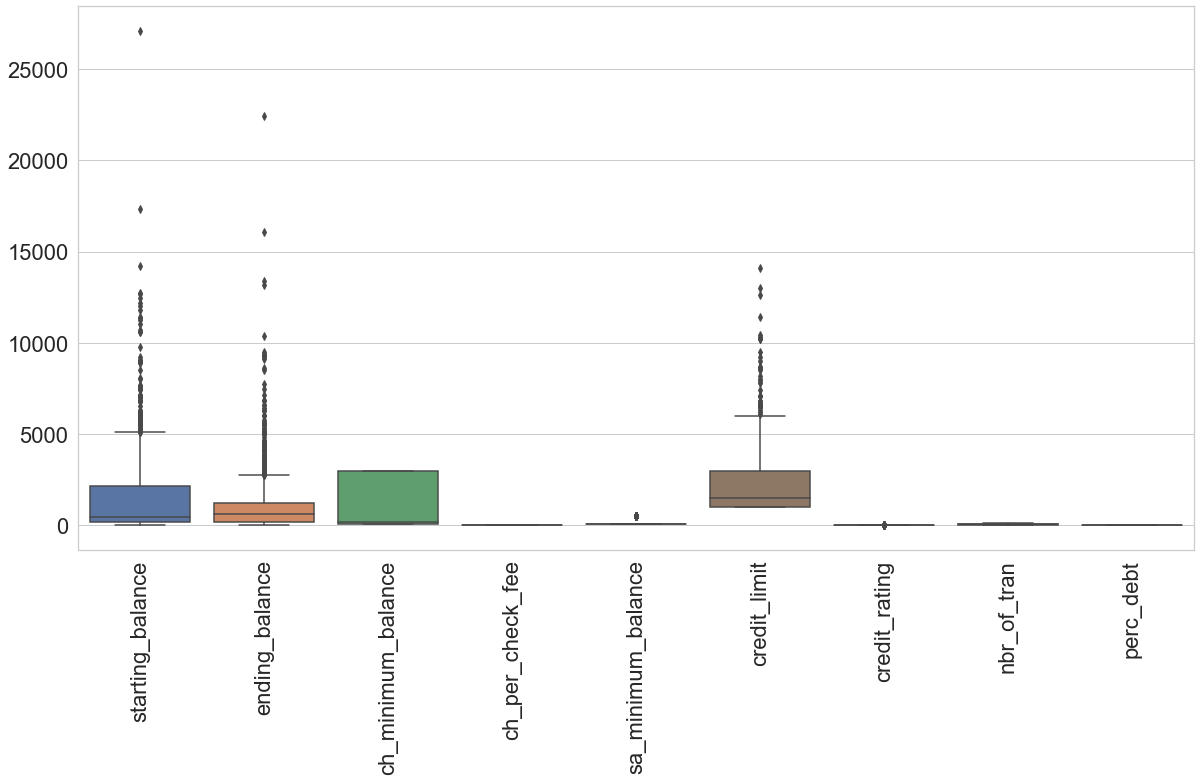

In [685]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
sns.boxplot(data=df_acct[['starting_balance','ending_balance','ch_minimum_balance',\
                          'ch_per_check_fee',\
                          'sa_minimum_balance',\
                          'credit_limit','credit_rating','nbr_of_tran','perc_debt']])
plt.xticks(rotation=90)
sns.set(font_scale=2.0) 
plt.show()

#### Although there are some outliers, they seems to make sense and are consistent. A high starting balance also has high ending balance and credit limits. 

### 

### Look for highly correlated features

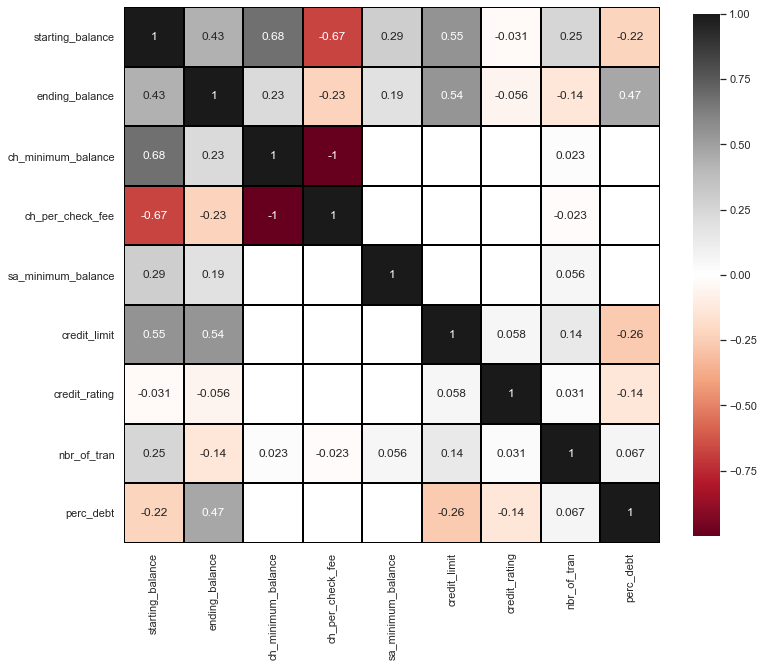

In [704]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,12))
corr = df_acct[['starting_balance','ending_balance','ch_minimum_balance',\
                          'ch_per_check_fee',\
                          'sa_minimum_balance',\
                          'credit_limit','credit_rating','nbr_of_tran','perc_debt']].corr()

sns.heatmap(corr, annot=True, square=True, cmap='RdGy', linewidths=1, linecolor='black', cbar_kws={"shrink": .8})

sns.set(font_scale=1.0) 
plt.show()

#### 1. We can see that some squares are blank and that makes sense since they are comparing exlcusive features (i.e., checking minimum balance vs savings minimum balance).
#### 2. We can also see that ch_per_check_fee is highly correlated with starting_balance and ch_minimum_balance. We can go ahead and drop ch_per_check_fee.

In [705]:
df_acct.drop(['ch_per_check_fee'], axis = 1, inplace = True)

### 

### Fill NA

In [706]:
df_acct = df_acct.fillna(0)

#### 

#### Drop ['cust_id_acct_nbr','acct_nbr','cust_id']

In [711]:
df_acct.drop(['cust_id_acct_nbr','acct_nbr','cust_id'], axis = 1, inplace=True)

#### 

### Standardize DataFrame

In [712]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
acct_std = scaler.fit_transform(df_acct)

In [713]:
df_acct_std = pd.DataFrame(acct_std)

In [714]:
df_acct_std.columns = df_acct.columns

In [715]:
df_acct_std.describe()

,starting_balance,ending_balance,ch_minimum_balance,sa_minimum_balance,credit_limit,credit_rating,perc_debt,nbr_of_tran,acct_type_CC,acct_type_CK,acct_type_SV,sa_acct_type_BS,sa_acct_type_MM,sa_acct_type_NA
count,1.266000e+03,1.266000e+03,1.266000e+03,1.266000e+03,1.266000e+03,1.266000e+03,1.266000e+03,1.266000e+03,1.266000e+03,1.266000e+03,1.266000e+03,1.266000e+03,1.266000e+03,1.266000e+03
mean,-2.104688e-18,-1.639903e-17,2.108196e-16,-6.011516e-17,1.152317e-16,-1.129735e-16,-5.489728e-17,6.770080e-17,1.603071e-16,-2.422145e-16,-2.229216e-16,-1.038313e-16,-6.743772e-17,2.229216e-16
std,1.000395e+00,1.000395e+00,1.000395e+00,1.000395e+00,1.000395e+00,1.000395e+00,1.000395e+00,1.000395e+00,1.000395e+00,1.000395e+00,1.000395e+00,1.000395e+00,1.000395e+00,1.000395e+00
min,-6.418411e-01,-6.582970e-01,-4.648791e-01,-4.506732e-01,-4.849166e-01,-1.162719e-01,-5.525316e-01,-1.674163e+00,-7.083639e-01,-7.658108e-01,-6.487491e-01,-5.365577e-01,-2.799367e-01,-1.541428e+00
25%,-5.603421e-01,-5.568048e-01,-4.648791e-01,-4.506732e-01,-4.849166e-01,-1.162719e-01,-5.525316e-01,-8.947734e-01,-7.083639e-01,-7.658108e-01,-6.487491e-01,-5.365577e-01,-2.799367e-01,-1.541428e+00
50%,-4.322916e-01,-2.799296e-01,-4.648791e-01,-4.506732e-01,-4.849166e-01,-1.162719e-01,-5.525316e-01,-2.802545e-01,-7.083639e-01,-7.658108e-01,-6.487491e-01,-5.365577e-01,-2.799367e-01,6.487491e-01
75%,3.409013e-01,8.500876e-02,-3.725451e-01,3.172303e-01,8.818312e-02,-1.162719e-01,8.327226e-02,1.293513e+00,1.411704e+00,1.305806e+00,1.541428e+00,-5.365577e-01,-2.799367e-01,6.487491e-01
max,1.174950e+01,1.323705e+01,2.305141e+00,3.388844e+00,7.595790e+00,1.204904e+01,2.235042e+00,2.972199e+00,1.411704e+00,1.305806e+00,1.541428e+00,1.863732e+00,3.572236e+00,6.487491e-01


#### 

### K-means clustering with k = 5

In [716]:
km = KMeans(n_clusters=5, # how many clusters that was provided in the question
            n_init=20, # how many initial runs
            random_state=None)

In [717]:
# fit and predict
y_km = km.fit_predict(acct_std)
df_y_km = pd.DataFrame(y_km)
df_y_km.rename(columns = {0:'cluster'}, inplace = True)

#### 

### Plot cluster in radar plot (polar in matplotlib) 

In [724]:
plot_data = km.cluster_centers_ #We want to plot the center of each cluster
print(plot_data.min()) #Find the min value for the radial labels
print(plot_data.max()) #Find the max value for the radial labels

-1.5414279094398171
3.5722359335880087


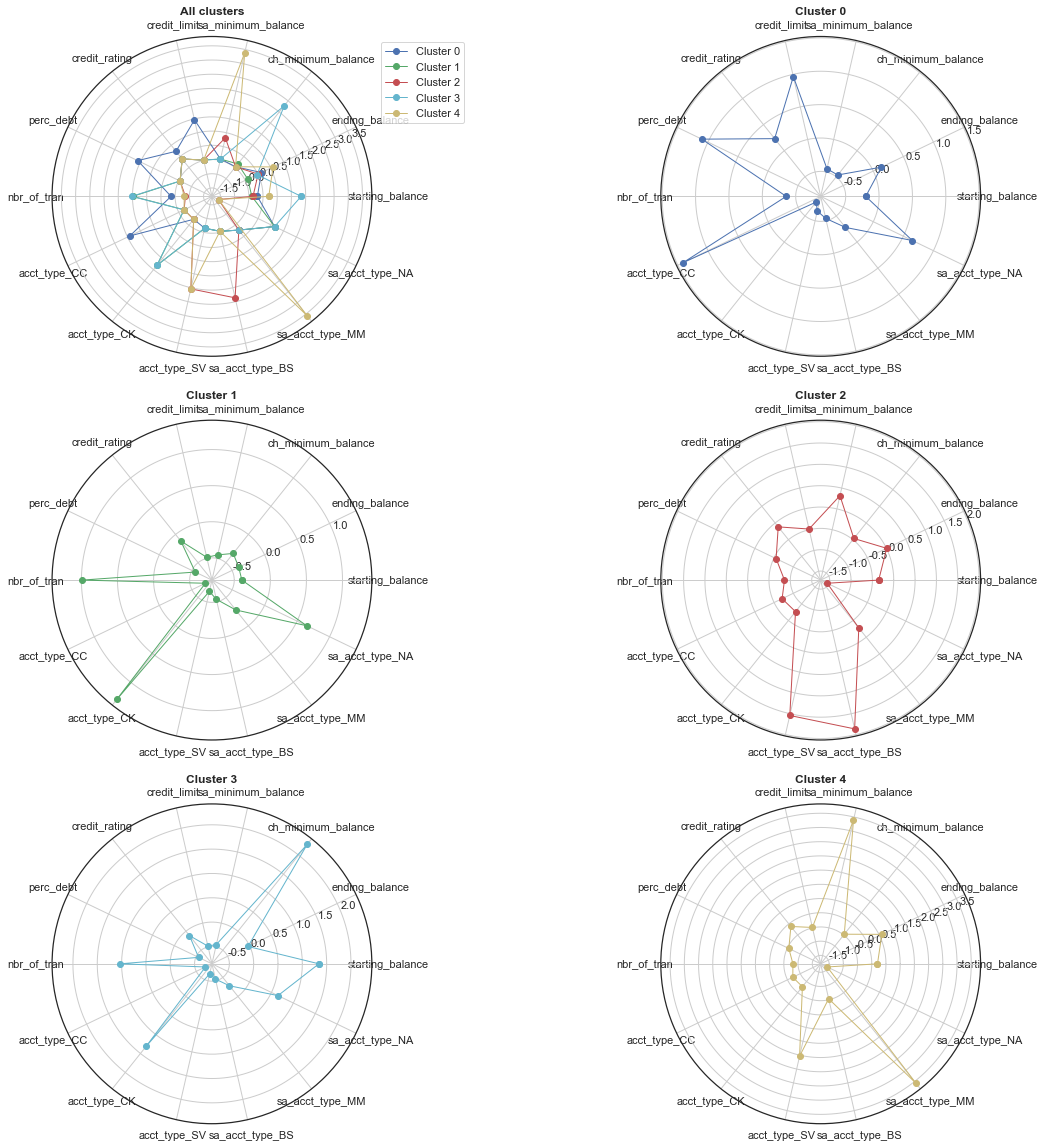

In [725]:
labels = df_acct_std.columns 
k = 5
n_features = 14
min_r = -2.0
max_r = 4.5

sns.set_style('white')
color = ['b', 'g', 'r', 'c', 'y'] 

angles = np.linspace(0, 2*np.pi, n_features, endpoint=False)
angles = np.concatenate((angles, [angles[0]])) 
plot_data = np.concatenate((plot_data, plot_data[:,[0]]), axis=1) 

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(321, polar=True) 
ax.set_rgrids(np.arange(min_r, max_r, 0.5), np.arange(min_r, max_r, 0.5))
ax.set_thetagrids(angles * 180/np.pi, labels)
for i in range(len(plot_data)):
    ax.plot(angles, plot_data[i], 'o-', color = color[i], label = 'Cluster '+str(i), linewidth=1)
plt.legend(bbox_to_anchor=(1.01,1),loc='upper left')
ax.set_title('All clusters', fontweight='bold')

ax2 = fig.add_subplot(322, polar=True) 
ax2.set_rgrids(np.arange(min_r, max_r, 0.5), np.arange(min_r, max_r, 0.5))
ax2.set_thetagrids(angles * 180/np.pi, labels)
ax2.plot(angles, plot_data[0], 'o-', color = color[0], label = 'Cluster '+str(0), linewidth=1)
ax2.set_title('Cluster '+str(0), fontweight='bold')

ax3 = fig.add_subplot(323, polar=True) 
ax3.set_rgrids(np.arange(min_r, max_r, 0.5), np.arange(min_r, max_r, 0.5))
ax3.set_thetagrids(angles * 180/np.pi, labels)
ax3.plot(angles, plot_data[1], 'o-', color = color[1], label = 'Cluster '+str(1), linewidth=1)
ax3.set_title('Cluster '+str(1), fontweight='bold')

ax4 = fig.add_subplot(324, polar=True) 
ax4.set_rgrids(np.arange(min_r, max_r, 0.5), np.arange(min_r, max_r, 0.5))
ax4.set_thetagrids(angles * 180/np.pi, labels)
ax4.plot(angles, plot_data[2], 'o-', color = color[2], label = 'Cluster '+str(2), linewidth=1)
ax4.set_title('Cluster '+str(2), fontweight='bold')

ax5 = fig.add_subplot(325, polar=True) 
ax5.set_rgrids(np.arange(min_r, max_r, 0.5), np.arange(min_r, max_r, 0.5))
ax5.set_thetagrids(angles * 180/np.pi, labels)
ax5.plot(angles, plot_data[3], 'o-', color = color[3], label = 'Cluster '+str(3), linewidth=1)
ax5.set_title('Cluster '+str(3), fontweight='bold')

ax6 = fig.add_subplot(326, polar=True) 
ax6.set_rgrids(np.arange(min_r, max_r, 0.5), np.arange(min_r, max_r, 0.5))
ax6.set_thetagrids(angles * 180/np.pi, labels)
ax6.plot(angles, plot_data[4], 'o-', color = color[4], label = 'Cluster '+str(4), linewidth=1)
ax6.set_title('Cluster '+str(4), fontweight='bold')

plt.show()